In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Data/small_train_feature_extracted.csv')
df.head()

fullVisitorId  visitCount  cityCount continent      subContinent  \
0   5.103959e+12           1          1  Americas  Northern America   
1   1.027855e+13           1          1   Oceania       Australasia   
2   2.672280e+13           1          1    Europe   Northern Europe   
3   2.737658e+13           1          1  Americas  Northern America   
4   9.008503e+13           1          1  Americas  Northern America   

          country                           city  source   medium  \
0   United States  not available in demo dataset  google  organic   
1     New Zealand  not available in demo dataset  google  organic   
2  United Kingdom  not available in demo dataset  google  organic   
3   United States  not available in demo dataset  google  organic   
4   United States  not available in demo dataset  google  organic   

          channel  ...  weekDaysCount  weekEndDayCount  meanHour  platform  \
0  Organic Search  ...              0                1      22.0    mobile   
1  Organic Search  ...              1                0       5.0   desktop   
2  Organic Search  ...              1                0      10.0   desktop   
3  Organic Search  ...              0                1       2.0   desktop   
4  Organic Search  ...              0                1      20.0    mobile   

   platformCount browser  hitsMedian hitsMean  hitsMax  logRevenue  
0              1  Chrome        10.0     10.0       10         0.0  
1              1  Chrome        11.0     11.0       11         0.0  
2              1  Safari         3.0      3.0        3         0.0  
3              1  Chrome         6.0      6.0        6         0.0  
4              1  Chrome         1.0      1.0        1         0.0  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85900 entries, 0 to 85899
Data columns (total 22 columns):
fullVisitorId      85900 non-null float64
visitCount         85900 non-null int64
cityCount          85900 non-null int64
continent          85900 non-null object
subContinent       85900 non-null object
country            85900 non-null object
city               85900 non-null object
source             85900 non-null object
medium             85900 non-null object
channel            85900 non-null object
isUSA              85900 non-null bool
isTrueDirect       85900 non-null bool
weekDaysCount      85900 non-null int64
weekEndDayCount    85900 non-null int64
meanHour           85900 non-null float64
platform           85900 non-null object
platformCount      85900 non-null int64
browser            85900 non-null object
hitsMedian         85900 non-null float64
hitsMean           85900 non-null float64
hitsMax            85900 non-null int64
logRevenue         85900 non-null fl

In [4]:
df['city'] = df['city'].astype('category')
df['platform'] = df['platform'].astype('category')
df['browser'] = df['browser'].astype('category')
df['medium'] = df['medium'].astype('category')
df['source'] = df['source'].astype('category')
df['channel'] = df['channel'].astype('category')
df['country'] = df['country'].astype('category')
df['subContinent'] = df['subContinent'].astype('category')
df['continent'] = df['continent'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85900 entries, 0 to 85899
Data columns (total 22 columns):
fullVisitorId      85900 non-null float64
visitCount         85900 non-null int64
cityCount          85900 non-null int64
continent          85900 non-null category
subContinent       85900 non-null category
country            85900 non-null category
city               85900 non-null category
source             85900 non-null category
medium             85900 non-null category
channel            85900 non-null category
isUSA              85900 non-null bool
isTrueDirect       85900 non-null bool
weekDaysCount      85900 non-null int64
weekEndDayCount    85900 non-null int64
meanHour           85900 non-null float64
platform           85900 non-null category
platformCount      85900 non-null int64
browser            85900 non-null category
hitsMedian         85900 non-null float64
hitsMean           85900 non-null float64
hitsMax            85900 non-null int64
logRevenue        

In [5]:
print(df['city'].cat.codes)
print(df['city'].cat.categories)

0        530
1        530
2        530
3        530
4        530
        ... 
85895     35
85896    304
85897    530
85898    530
85899    530
Length: 85900, dtype: int16
Index([''s Hertogenbosch', '(not set)', 'Aalborg', 'Aberdeen', 'Abu Dhabi',
       'Adana', 'Ahmedabad', 'Akron', 'Alexandria', 'Alicante',
       ...
       'Wroclaw', 'Yokohama', 'Zagreb', 'Zapopan', 'Zaragoza', 'Zaventem',
       'Zhongli District', 'Zurich', 'Zwolle',
       'not available in demo dataset'],
      dtype='object', length=531)


In [6]:
df_with_encoded_features = df.copy()

df_with_encoded_features['city'] = df_with_encoded_features['city'].cat.codes
df_with_encoded_features['source'] = df_with_encoded_features['source'].cat.codes
df_with_encoded_features['medium'] = df_with_encoded_features['medium'].cat.codes
df_with_encoded_features['platform'] = df_with_encoded_features['platform'].cat.codes
df_with_encoded_features['browser'] = df_with_encoded_features['browser'].cat.codes
df_with_encoded_features['channel'] = df_with_encoded_features['channel'].cat.codes
df_with_encoded_features['country'] = df_with_encoded_features['country'].cat.codes
df_with_encoded_features['continent'] = df_with_encoded_features['continent'].cat.codes
df_with_encoded_features['subContinent'] = df_with_encoded_features['subContinent'].cat.codes

df_with_encoded_features.head()

fullVisitorId  visitCount  cityCount  continent  subContinent  country  \
0   5.103959e+12           1          1          2            12      178   
1   1.027855e+13           1          1          5             1      121   
2   2.672280e+13           1          1          4            13      177   
3   2.737658e+13           1          1          2            12      178   
4   9.008503e+13           1          1          2            12      178   

   city  source  medium  channel  ...  weekDaysCount  weekEndDayCount  \
0   530      57       5        4  ...              0                1   
1   530      57       5        4  ...              1                0   
2   530      57       5        4  ...              1                0   
3   530      57       5        4  ...              0                1   
4   530      57       5        4  ...              0                1   

   meanHour  platform  platformCount  browser  hitsMedian  hitsMean  hitsMax  \
0      22.0         1              1        5        10.0      10.0       10   
1       5.0         0              1        5        11.0      11.0       11   
2      10.0         0              1       24         3.0       3.0        3   
3       2.0         0              1        5         6.0       6.0        6   
4      20.0         1              1        5         1.0       1.0        1   

   logRevenue  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 22 columns]

In [7]:
df_with_encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85900 entries, 0 to 85899
Data columns (total 22 columns):
fullVisitorId      85900 non-null float64
visitCount         85900 non-null int64
cityCount          85900 non-null int64
continent          85900 non-null int8
subContinent       85900 non-null int8
country            85900 non-null int16
city               85900 non-null int16
source             85900 non-null int16
medium             85900 non-null int8
channel            85900 non-null int8
isUSA              85900 non-null bool
isTrueDirect       85900 non-null bool
weekDaysCount      85900 non-null int64
weekEndDayCount    85900 non-null int64
meanHour           85900 non-null float64
platform           85900 non-null int8
platformCount      85900 non-null int64
browser            85900 non-null int8
hitsMedian         85900 non-null float64
hitsMean           85900 non-null float64
hitsMax            85900 non-null int64
logRevenue         85900 non-null float64
dtypes: b

In [8]:
# GBM на дереьвях решений, лес решений, SVM, линейная регрессия

In [9]:
X = df_with_encoded_features.loc[:, df_with_encoded_features.columns != 'logRevenue']
X.head()

fullVisitorId  visitCount  cityCount  continent  subContinent  country  \
0   5.103959e+12           1          1          2            12      178   
1   1.027855e+13           1          1          5             1      121   
2   2.672280e+13           1          1          4            13      177   
3   2.737658e+13           1          1          2            12      178   
4   9.008503e+13           1          1          2            12      178   

   city  source  medium  channel  ...  isTrueDirect  weekDaysCount  \
0   530      57       5        4  ...         False              0   
1   530      57       5        4  ...         False              1   
2   530      57       5        4  ...         False              1   
3   530      57       5        4  ...         False              0   
4   530      57       5        4  ...         False              0   

   weekEndDayCount  meanHour  platform  platformCount  browser  hitsMedian  \
0                1      22.0         1              1        5        10.0   
1                0       5.0         0              1        5        11.0   
2                0      10.0         0              1       24         3.0   
3                1       2.0         0              1        5         6.0   
4                1      20.0         1              1        5         1.0   

   hitsMean  hitsMax  
0      10.0       10  
1      11.0       11  
2       3.0        3  
3       6.0        6  
4       1.0        1  

[5 rows x 21 columns]

In [10]:
y = df_with_encoded_features['logRevenue']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: logRevenue, dtype: float64

In [11]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_labels = X_train['fullVisitorId']
X_test_labels = X_test['fullVisitorId']

# col_indexes = [1, 5, 6, 7, 8, 10]
col_indexes = [i for i in range(1, len(X_train.columns))]
X_train = X_train.iloc[:,  col_indexes]
X_test = X_test.iloc[:, col_indexes]

In [13]:
X_train.head()

visitCount  cityCount  continent  subContinent  country  city  source  \
60589           1          1          3            18       73   530     173   
50991           1          1          4            22      161   528      57   
63817           1          1          2            15       24   530     173   
13505           1          1          2            15       24   530     173   
56453           1          1          2             3       47   530       6   

       medium  channel  isUSA  isTrueDirect  weekDaysCount  weekEndDayCount  \
60589       6        7  False         False              0                1   
50991       5        4  False         False              1                0   
63817       6        7  False         False              1                0   
13505       6        7  False         False              0                1   
56453       2        1  False         False              1                0   

       meanHour  platform  platformCount  browser  hitsMedian  hitsMean  \
60589       1.0         0              1        5         1.0       1.0   
50991      17.0         2              1        5         1.0       1.0   
63817       9.0         0              1        5         1.0       1.0   
13505      19.0         1              1        5         2.0       2.0   
56453      18.0         1              1        2         5.0       5.0   

       hitsMax  
60589        1  
50991        1  
63817        1  
13505        2  
56453        5

In [14]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test)

0.1659355600488659

In [32]:
print(linreg.coef_)

[-1.93167459e-02 -8.78835935e-02  8.41341905e-03  1.22915937e-03
  1.82870137e-04 -7.65571548e-05  6.12787031e-04  1.71419798e-02
  2.58309760e-02  2.37673101e-01  2.88876545e-01  9.53788014e-04
 -2.02705339e-02  6.21695356e-03 -1.06134991e-01 -2.77555756e-17
 -4.75703175e-04  2.28492330e-02 -4.72189917e-02  9.66235112e-02]


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

GBM = GradientBoostingRegressor()

In [16]:
params = {
    'ccp_alpha': [0.0, 0.2],
    'learning_rate': [0.05, 0.025],
    'max_depth':[3], 
    'n_estimators':[50, 100, 150]
}

In [17]:
GBM_grid_cv = GridSearchCV(GBM, params, cv=5, n_jobs=-1)
GBM_grid_cv.fit(X_train, y_train.to_numpy().ravel())
print(GBM_grid_cv.best_score_)

0.24177106097187986


In [18]:
GBM_grid_cv.score(X_test, y_test.to_numpy().ravel())

0.27321883741734065

In [19]:
GBM_grid_cv.score(X_train, y_train.to_numpy().ravel())

0.2855855893805179

In [20]:
print(GBM_grid_cv.best_params_)

{'ccp_alpha': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [21]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

params = {
    'n_estimators':[50, 100, 150],
    'n_jobs': [-1]
}

random_forest_cv = GridSearchCV(random_forest, params, cv=5)
random_forest_cv.fit(X_train, y_train.to_numpy().ravel())

# print(random_forest_cv.best_score_)
# print(random_forest_cv.best_params_)
print(random_forest_cv.score(X_train, y_train.to_numpy().ravel()))

0.8685116465469745


In [22]:
print(random_forest_cv.score(X_test, y_test.to_numpy().ravel()))

0.19401613725390524


In [24]:
from sklearn.svm import SVR

svr = SVR()

params = {
    'kernel':['linear', 'poly'],
}

svr_cv = GridSearchCV(svr, params, cv=5)
svr.fit(X_train, y_train.to_numpy().ravel())

# print(svr_cv.best_score_)
# print(svr_cv.best_params_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
print(svr.score(X_train, y_train.to_numpy().ravel()))

-0.0039029484976798035


In [26]:
print(svr.score(X_test, y_test.to_numpy().ravel()))

-0.0050184410396867385


In [43]:
X_train.shape

(57553, 20)

In [70]:
from tqdm import tqdm

def generate_twenty_df(X_test_passed, y_test_passed):
    df_list = []
    print(X_test_passed.columns)
    for i in tqdm(range(0, 20)):
        X_train, X_test, y_train, y_test = train_test_split(X_test_passed, y_test_passed, test_size=0.2)
        df_list.append((X_test, y_test))
    return df_list


def get_twenty_scores(model, dataframes):
    col_indexes = [i for i in range(0, len(dataframes[0][0].columns))]
    return [model.score(dataframes[i][0].iloc[:, col_indexes], dataframes[i][1]) for i in range(len(dataframes))]

In [71]:
import matplotlib.pyplot as plt

dataframes = generate_twenty_df(X_test, y_test)
model_list = [linreg, GBM_grid_cv, random_forest_cv, svr]

scores_lists = []

for i in tqdm(range(len(model_list))):
    scores_lists.append(get_twenty_scores(model_list[i], dataframes))

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Index(['visitCount', 'cityCount', 'continent', 'subContinent', 'country',
       'city', 'source', 'medium', 'channel', 'isUSA', 'isTrueDirect',
       'weekDaysCount', 'weekEndDayCount', 'meanHour', 'platform',
       'platformCount', 'browser', 'hitsMedian', 'hitsMean', 'hitsMax'],
      dtype='object')


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]


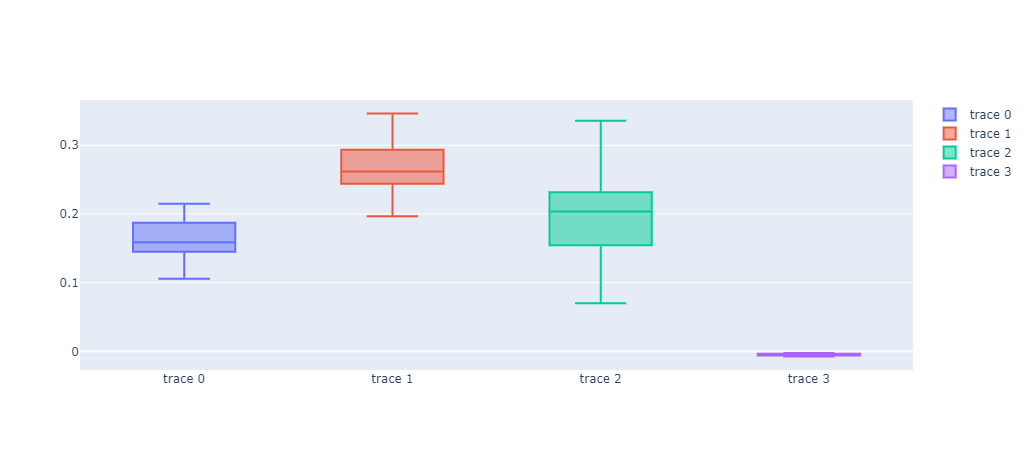

In [72]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.add_trace(go.Box(y=scores_lists[0]))
fig.add_trace(go.Box(y=scores_lists[1]))
fig.add_trace(go.Box(y=scores_lists[2])) 
fig.add_trace(go.Box(y=scores_lists[3]))

fig.show()